Analyze which was the most used programming language

In [44]:
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("QueryResults.csv") 


,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


change name dataframe: DATE, TAG AND POSTS

In [11]:
df = df.rename(columns={"m": "DATE", "TagName": "TAG", "Unnamed: 2": "POSTS"}) 
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [12]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [15]:
df.shape

(1991, 3)

-------------------------------------------------------------------------------------------------------------------------


I see the number of nulls in each column

In [16]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

------------------------------------------------------------------------------

programming language had the most number of posts since the creation of Stack Overflow

In [17]:
df.groupby(["TAG"]).sum()

C:\Users\Bounset\AppData\Local\Temp\ipykernel_11580\2956257232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["TAG"]).sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


The programming language that has the most posts is JavaScript

-----------------------------------------------------------------------------------------------------------

many months of entries exist per programming language

In [18]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144



All languages ​​have a considerable income per month

---------------------------------------------------------------------------------------------------------------------------

we convert the data type from str to datetime

In [30]:
type(df["DATE"][1]) 

str

Convierto toda la columna de DATE en formato fecha, i convert the entire DATE column into date format

In [31]:
df.DATE = pd.to_datetime(df.DATE) 
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


----------------------------------------------------------------------------------------------------------------------

Now I am going to change so that the dates are in the final and each language in a column

In [33]:
df_reshaped = df.pivot(index="DATE", columns="TAG", values="POSTS") 
df_reshaped

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [34]:
df_reshaped.shape

(145, 14)

In [35]:
df_reshaped.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

-----------------------------------------------------------------------------------------------------

I see values NaN

In [36]:
df_reshaped.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

As you can see there are null values

In this case I do not want to eliminate the rows of those null values, I am going to replace it with 0

In [38]:
df_reshaped.fillna(0, inplace=True) 
df_reshaped

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


I check if there are null values ​​left

In [39]:
df_reshaped.isna().values.any()

False

there are no nulls

-----------------------------------------------------------------------------------------------------------

VISUALISATION

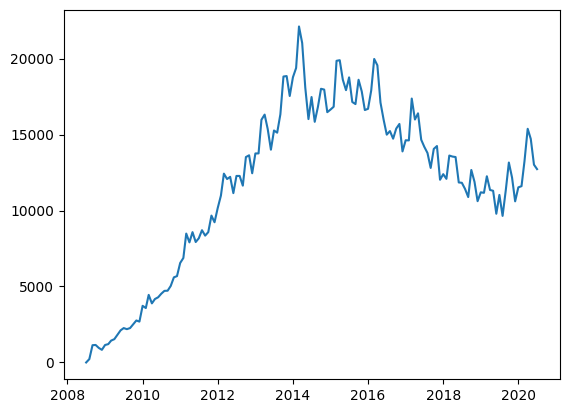

In [46]:
plt.plot(df_reshaped.index, df_reshaped['java'])


I will never get a value of 0 posts, in this way stable that limit y-axis

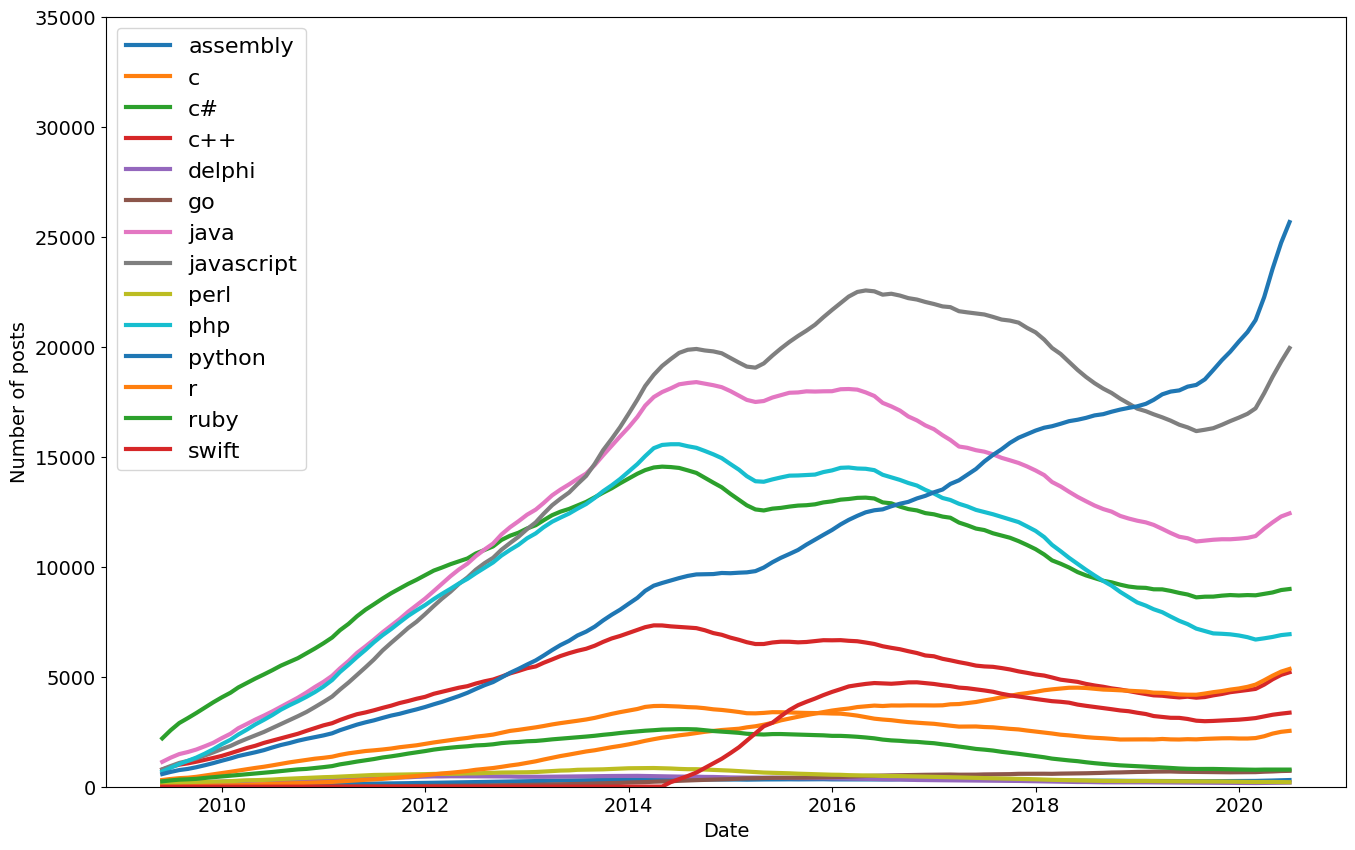

In [63]:
roll_df = df_reshaped.rolling(window=12).mean() 

plt.figure(figsize=(16,10))  
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.xlabel("Date", fontsize=14) 
plt.ylabel("Number of posts", fontsize=14) 
plt.ylim(0, 35000) 

for column in df_reshaped.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16) 

I can see that python in 2020 is the programming language with the most posts


I could draw the conclusion that studying Python for the future is a very good option

he most popular programming language from 2008 to 2012 is C#

popular programming language from 2015 to 2018 is JavaScript

---------------------------------------------------------------------------------------------------------------------------------